# Happiness Source: External or Internal  
This project aims to analysis the sources where people gain happiness from, which is inspired by the popular MBTI personality test. In the MBTI test, we would find out how our attitudes would be, i.e. Introversion or Extraversion. Introvert people seek energy inwards, and outrovert people receive energy outwards. This difference has inspired me to inspect happiness experience from the perspective of source. To be specific, this project will address the following questions:   
1. Do people more likely to gain happniess from external sources or internal sources?  
2. How do the scources people gain happiness from differ with gender/age/marital/parenthood status as well as reflection period?  
3. What's the practical values of the findings?  

## Load packges and pre-processed data
This project is based on pre-processed data from Text_Processing.Rmd

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [8]:
hm_data = pd.read_csv("..\output\processed_moments.csv")

In [9]:
urlfile = 'https://raw.githubusercontent.com/rit-public/HappyDB/master/happydb/data/demographic.csv'
demo_data = pd.read_csv(urlfile)

## Q1: do people more likely to gain happniess from external sources or internal sources?


### Step 1 : Indentify happiness sources
We first need to identify the happiness sources mentioned in the text. Here, internal sources are defined as those without a second party (human beings, pets etc.) involved, while sources related to nature are viewed as internal (since nature is passive in the experience). And external sources are therefore the opposite. The strategy is to examine where there's another pronoun other than the first person singular appearing in the text.

The happy moments in our data have already been devided into seven different categories, which are affection, achievement, enjoy the moment, bonding, leisure, nature and exercise. By common sense, we could generally infer that happiness categorized as bonding and affection are externally sourced, while the one in achievement and nature is more likely to be internally sourced. For thoes moments in other three categories, both way could be possible. 

In [10]:
# load label data
urlfile = 'https://raw.githubusercontent.com/rit-public/HappyDB/master/happydb/data/senselabel.csv'
senselabel_data = pd.read_csv(urlfile)

In [11]:
# determine which sources are external
sources = senselabel_data[(senselabel_data['POS'].isin(['PRON', 'n.person'])) | (senselabel_data['lowercaseLemma'].isin(['someone','person','people','friend']))]
sources = sources[~sources['lowercaseLemma'].isin(['i', 'me','myself'])]
sources['source'] = 'external'
sources = sources[['hmid','source']].drop_duplicates()

In [12]:
# merge with hm_data
hm_data = pd.merge(hm_data, sources, on='hmid', how='left')
hm_data['source'] = hm_data['source'].fillna('internal')

In [13]:
# brief view of the result
hm_data.head()

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category,id,text,source
0,27673,2053,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,NaN,affection,1,connected date successfully sympathy,external
1,27674,2,24h,I was happy when my son got 90% marks in his e...,I was happy when my son got 90% marks in his e...,True,1,NaN,affection,2,examination marks son,external
2,27675,1936,24h,I went to the gym this morning and did yoga.,I went to the gym this morning and did yoga.,True,1,NaN,exercise,3,gym morning yoga,internal
3,27676,206,24h,We had a serious talk with some friends of our...,We had a serious talk with some friends of our...,True,2,bonding,bonding,4,evening flaky friend hang talked understood,external
4,27677,6227,24h,I went with grandchildren to butterfly display...,I went with grandchildren to butterfly display...,True,1,NaN,affection,5,butterfly conservatory crohn display grandchil...,internal


### Step 2: Visualize the result

**Pie Chart**  
By adopting pie chart we could observe that almost 70% of happiness experience are external sourced, while the rest 30% are internally sourced.

In [ ]:
hm_data = pd.read_csv("..\output\processed_moments.csv")

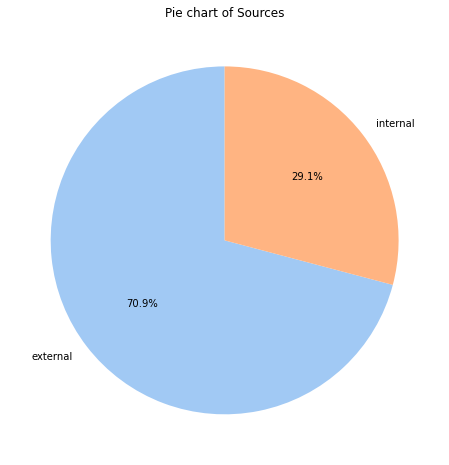

In [17]:
# pie chart
sources_count = pd.DataFrame(hm_data['source'].value_counts())
plt.figure(figsize=(8, 8))
plt.pie(sources_count['source'], labels=sources_count.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Pie chart of Sources')
plt.savefig(r'..\figs\source_piechart.png')
plt.show()


### Step 3: Topics identification

**Word Cloud**  
The two different word clouds suggest that people generally gain happiness externally when they are around their close ones, such as families and partners, and gain happiness internally when they making personal achievements, feeling materially satisfied, or having enjoyable experiences.

In [18]:
from wordcloud import STOPWORDS
STOPWORDS.update(['day','time'])

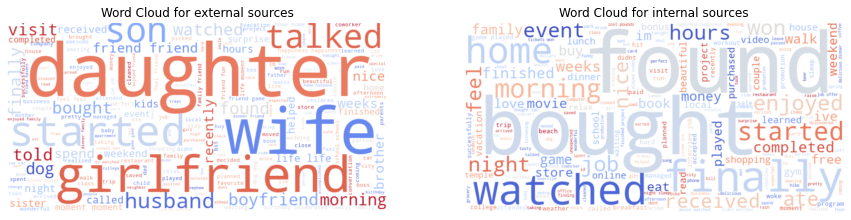

In [19]:
# word cloud
external_text = ' '.join(hm_data[hm_data['source'] == 'external']['text'])
internal_text = ' '.join(hm_data[hm_data['source'] == 'internal']['text'].astype(str))

wordcloud_external = WordCloud(width=800, height=400, background_color='white', colormap='coolwarm', stopwords = STOPWORDS).generate(external_text)
wordcloud_internal = WordCloud(width=800, height=400, background_color='white', colormap='coolwarm', stopwords = STOPWORDS).generate(internal_text)

plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_external, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for external sources')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_internal, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for internal sources')

plt.savefig(r'..\figs\source_wordcloud.png')
plt.show()

**LDA**  
Based on the topic distributions for both external and internal sources, we can identify the following topics:  

External:    
- Social Activities: This topic seems to be associated with social gatherings and activities, such as spending time with friends, having dinner, playing games, etc.  
- Celebrations and Events: This topic appears to involve events and celebrations, such as birthdays, surprises, gifts, etc.  
- Family and Home: This topic revolves around family-related activities and home-related experiences.  
- Emotional Moments: This topic seems to encompass emotional moments and expressions of feelings.  

Internal:  
- Home and Dining: This topic appears to involve activities related to home and dining experiences.  
- Material Satisfaction: This topic relate to spending, purchasing and feel material satisfied.  
- Leisure and Relaxation: This topic appears to involve leisure activities and relaxation experiences.
- Entertainment and Recreation: This topic seems to encompass experiences related to playing games, watching videos, going for walks, etc.

## Q2: how do the sources people gain happiness from differ with gender/age/marital/parenthood status as well as reflection period? 

In [13]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
STOPWORDS.update(['day','time'])

In [24]:
# conver series to list
external_list = hm_data[hm_data['source'] == 'external']['text'].tolist()
internal_list = hm_data[hm_data['source'] == 'internal']['text'].astype(str).tolist()

In [ ]:
# tokenize
def preprocess(text):
    result = []
    for token in simple_preprocess(text):
        if token not in STOPWORDS and len(token) > 3:
            result.append(token)
    return result

In [28]:
# LDA 
# for external
processed_text = [preprocess(doc) for doc in external_list]
dictionary = corpora.Dictionary(processed_text)
corpus = [dictionary.doc2bow(doc) for doc in processed_text]
lda_model_external = LdaModel(corpus=corpus, id2word=dictionary, num_topics=4, passes=10)

# for internal
processed_text = [preprocess(doc) for doc in internal_list]
dictionary = corpora.Dictionary(processed_text)
corpus = [dictionary.doc2bow(doc) for doc in processed_text]
lda_model_internal = LdaModel(corpus=corpus, id2word=dictionary, num_topics=4, passes=10)

In [29]:
# Interpret topics
print("Topics for external sources:")
for idx, topic in lda_model_external.print_topics(-1):
    print(f"Topic {idx}: {topic}")

print("Topics for internal sources:")
for idx, topic in lda_model_internal.print_topics(-1):
    print(f"Topic {idx}: {topic}")

Topics for external sources:
Topic 0: 0.085*"friend" + 0.027*"played" + 0.027*"night" + 0.025*"watched" + 0.024*"dinner" + 0.024*"favorite" + 0.017*"enjoyed" + 0.017*"game" + 0.016*"girlfriend" + 0.014*"wife"
Topic 1: 0.032*"birthday" + 0.022*"sister" + 0.020*"surprise" + 0.016*"finished" + 0.016*"celebrated" + 0.013*"gift" + 0.013*"found" + 0.012*"money" + 0.012*"finally" + 0.011*"college"
Topic 2: 0.024*"home" + 0.017*"family" + 0.017*"house" + 0.014*"mother" + 0.012*"walk" + 0.010*"visit" + 0.009*"trip" + 0.009*"spent" + 0.009*"started" + 0.009*"finally"
Topic 3: 0.024*"feel" + 0.020*"life" + 0.020*"love" + 0.018*"moment" + 0.013*"called" + 0.011*"told" + 0.011*"morning" + 0.010*"received" + 0.010*"phone" + 0.008*"makes"
Topics for internal sources:
Topic 0: 0.047*"watched" + 0.029*"enjoyed" + 0.026*"dinner" + 0.022*"home" + 0.015*"family" + 0.015*"delicious" + 0.014*"moment" + 0.014*"lunch" + 0.012*"temple" + 0.011*"food"
Topic 1: 0.028*"bought" + 0.024*"money" + 0.024*"received" +

## Q2: how do the sources people gain happiness from differ with gender/age/marital/parenthood status as well as reflection period? 

In [20]:
hm_data_selected = hm_data[['hmid','wid','reflection_period','source']].drop_duplicates()

**Reflection Period**  
The result suggest that reflection period seems not influence the source of happiness

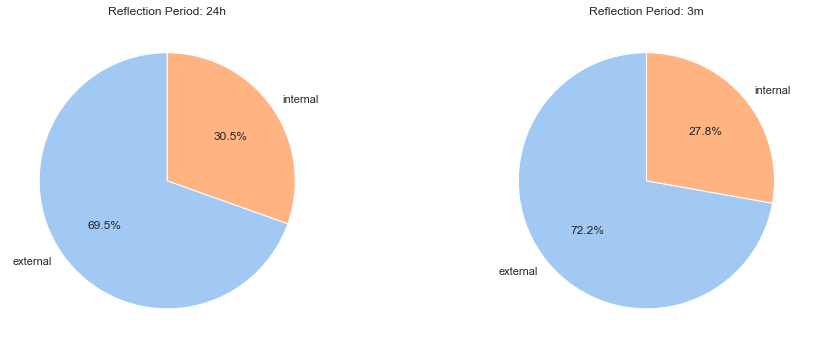

In [21]:
grouped_data = hm_data_selected.groupby(['reflection_period', 'source'])['hmid'].count().unstack()

sns.set()
sns.set_palette(sns.color_palette('pastel'))

reflection_periods = hm_data_selected['reflection_period'].unique()

fig, axes = plt.subplots(nrows=1, ncols=len(reflection_periods), figsize=(15, 5))

for i, period in enumerate(reflection_periods):
    data_for_period = grouped_data.loc[period]
    axes[i].pie(data_for_period, labels=data_for_period.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Reflection Period: {period}')

plt.tight_layout()
plt.savefig(r'..\figs\ref_period_piechart.png')
plt.show()

**Parenthood**  
The proportion of internally sourced happiness is lower for parents compared to those are not, which is consistent with our expectations. 

In [22]:
hm_data_demo = pd.merge(hm_data_selected, demo_data, on='wid', how='left')

In [23]:
hm_data_demo['parenthood'] = hm_data_demo['parenthood'].fillna('unknown')

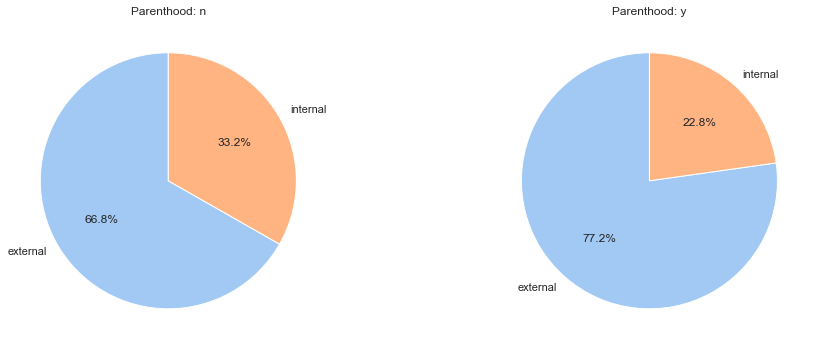

In [24]:
# Bar chart
grouped_data = hm_data_demo.groupby(['parenthood', 'source'])['hmid'].count().unstack()

sns.set()
sns.set_palette(sns.color_palette('pastel'))

parenthoods = hm_data_demo['parenthood'].unique()[:2]

fig, axes = plt.subplots(nrows=1, ncols=len(parenthoods), figsize=(15, 5))

for i, parenthood in enumerate(parenthoods):
    data_for_parenthood = grouped_data.loc[parenthood]
    axes[i].pie(data_for_parenthood, labels=data_for_parenthood.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Parenthood: {parenthood}')

plt.tight_layout()
plt.savefig(r'..\figs\parenthood_piechart.png')
plt.show()

**Gender**  
Compared to other different genders, females respondents have a larger proportion of happiness gained from external sources.

In [25]:
hm_data_demo['gender'] = hm_data_demo['gender'].fillna('unknown')

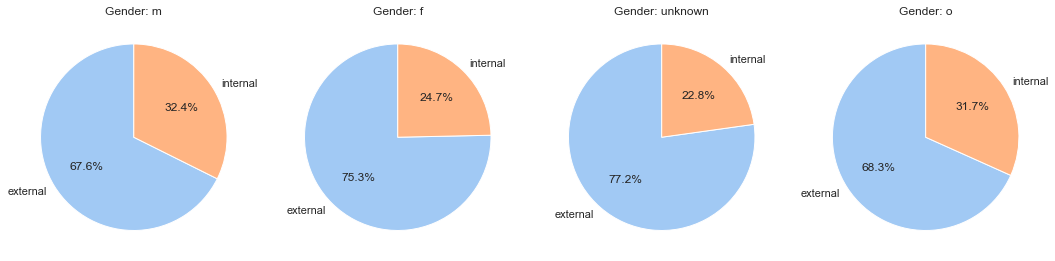

In [26]:
grouped_data = hm_data_demo.groupby(['gender', 'source'])['hmid'].count().unstack()

sns.set()
sns.set_palette(sns.color_palette('pastel'))

genders = hm_data_demo['gender'].unique()

fig, axes = plt.subplots(nrows=1, ncols=len(genders), figsize=(15, 5))

for i, gender in enumerate(genders):
    data_for_gender = grouped_data.loc[gender]
    axes[i].pie(data_for_gender, labels=data_for_gender.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Gender: {gender}')

plt.tight_layout()
plt.savefig(r'..\figs\gender_piechart.png')
plt.show()

**Marital**  
The result, again, is consistent with our common belief, that people who are not currently share a life with their partners are more likely to internally seek happiness, compared to those who are in a relationship.

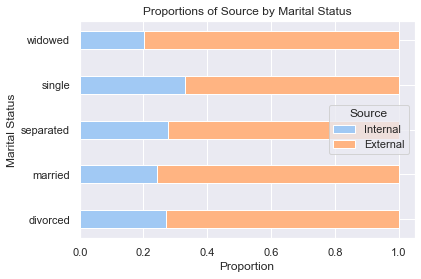

In [31]:
grouped_data = hm_data_demo.groupby(['marital', 'source'])['hmid'].count().unstack()
proportions = grouped_data.div(grouped_data.sum(axis=1), axis=0)

sns.set()
sns.set_palette(sns.color_palette('pastel'))

plt.barh(proportions.index, proportions['internal'], height=0.4, label='Internal', zorder=5)
plt.barh(proportions.index, proportions['external'], height=0.4, left=proportions['internal'], label='External', zorder=5)

plt.title('Proportions of Source by Marital Status')
plt.xlabel('Proportion')
plt.ylabel('Marital Status')
plt.legend(title='Source')

plt.savefig(r'..\figs\marital_barchart.png')

plt.show()

**Age**  
The result suggest that as age grows, people experience larger portion of happiness from external source, which could be explained by our findings associate with marital status and parenthoods.

In [28]:
# Clean the 'age' column
hm_data_demo['age_new'] = hm_data_demo['age'].replace('prefer not to say', 0)  # Replace "prefer not to say" with NaN
hm_data_demo['age_new'] = hm_data_demo['age_new'].str.extract(r'(\d+)').astype(float).astype(pd.Int64Dtype())  # Extract digits and convert to integers

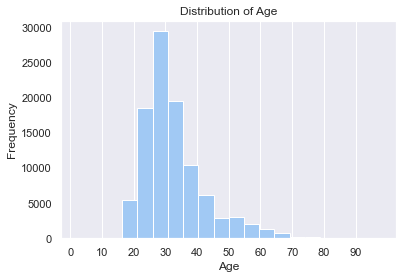

In [29]:
hm_data_demo_age = hm_data_demo['age_new'].dropna(inplace=False).astype(int)
hm_data_demo_age = hm_data_demo_age[hm_data_demo_age < 120]

sns.set()
sns.set_palette(sns.color_palette('pastel'))
plt.hist(hm_data_demo_age, bins=20) #only keep age within reasonable range
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(range(0, max(hm_data_demo_age), 10))
plt.grid(axis='y', alpha=0.5, linestyle='--')
plt.savefig(r'..\figs\age_distribution.png')
plt.show()

In [30]:
# divede age groups
hm_data_demo_age = hm_data_demo.copy()
hm_data_demo_age.dropna(inplace=True)
hm_data_demo_age['age_new'] = hm_data_demo_age['age_new'].astype(int)
bins = [0, 20, 30, 45, float('inf')]
labels = ['<20', '20-30', '30-45', '>45']
hm_data_demo_age['age_group'] = pd.cut(hm_data_demo_age['age_new'], bins=bins, labels=labels, right=False)

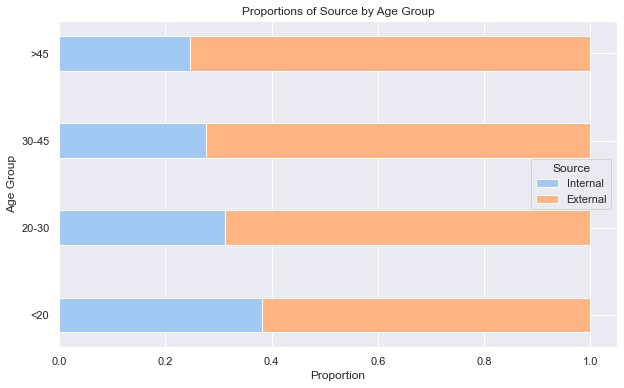

In [32]:
# plot
grouped_data_age_source = hm_data_demo_age.groupby(['age_group', 'source'])['hmid'].count().unstack()
proportions_age_source = grouped_data_age_source.div(grouped_data_age_source.sum(axis=1), axis=0)

sns.set()
sns.set_palette(sns.color_palette('pastel'))

plt.figure(figsize=(10, 6))
plt.barh(proportions_age_source.index, proportions_age_source['internal'], height=0.4, label='Internal', zorder=5)
plt.barh(proportions_age_source.index, proportions_age_source['external'], height=0.4, left=proportions_age_source['internal'], label='External', zorder=5)

plt.title('Proportions of Source by Age Group')
plt.xlabel('Proportion')
plt.ylabel('Age Group')
plt.legend(title='Source')
plt.savefig(r'..\figs\age_barchart.png')
plt.show()

## Q3: What's the practical values of the findings?  

The findings of this project offer valuable insights to enhance the quality of our lives and promote happiness:  
- Prioritizing meaningful interactions with our loved ones:   
    Whether it's watching movies, playing games, sharing meals, or celebrating special occasions like anniversaries and birthdays, dedicating time to cherish these moments with our loved ones can enrich our lives and create lasting memories. By fully immersing ourselves in these experiences, we can cultivate deeper connections and appreciate the beauty of shared moments.
- Offering more care to the elderly:   
    Spending time with family and children brings happiness to the lives of older individuals, especially for those who may no longer have their partners by their side. Therefore, accompanying them more frequently not only brings joy to their lives but also contributes to our own sense of happiness.
- Learning to spend time with oneself:  
     Enjoying a delightful dinner at home, immersing ourself in nature to appreciate life, or occasionally rewarding ourself with material goods, are all ways to break free from the pressures of work and daily life. These activities allow us to reconnect with and embrace our true selves, providing a much-needed respite from the stresses of life and gain happiness.